In [4]:
%load_ext autoreload
%autoreload 2


In [5]:

import os

import matplotlib.pyplot as plt
import numpy as np
import dotenv

from tiled.client import from_uri

from tr_ap_xps.processor import XPSProcessor, Result
from tr_ap_xps.cli import listen

dotenv.load_dotenv()

client = from_uri("http://localhost:8000/api", api_key=os.getenv("TILED_SINGLE_USER_API_KEY"))
if client.get("runs") is None:
    client.create_container("runs")


# Run
(optional) Perform a "run" with random data. In a separate terminal, startup the labview simulator:

```
python -m tr_ap_xps.simulator
```

Now, start the processor in a terminal:

```
python -m tr_ap_xps.cli
```

0
[[1.81111638 1.84096749 1.96329814 ... 2.469521   2.469521   2.39298963]]


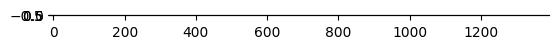

10
[[0.54523285 2.9965372  2.67947969 ... 0.67791738 0.86606735 1.28720348]
 [1.28720348 0.86606735 0.67791738 ... 0.54338986 0.51996546 1.42704183]
 [0.02212687 0.40253492 2.6033837  ... 0.87777964 1.58478542 1.58478542]
 ...
 [0.42452995 1.3194423  1.3194423  ... 2.25748173 1.17161644 1.28876473]
 [2.2385882  0.71361437 2.30940525 ... 0.9634451  1.11979141 1.35773933]
 [1.37240431 1.37240431 1.35773933 ... 2.33173658 3.18424217 2.76943371]]


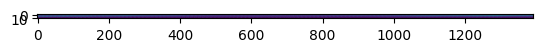

20
[[1.21525804 2.47240581 2.78725422 ... 3.41509714 3.05980294 2.09830673]
 [2.74921705 3.11810853 2.74532263 ... 0.77982496 0.93736464 0.93736464]
 [0.77982496 0.57669506 0.99095399 ... 2.06822928 0.11729298 1.75259996]
 ...
 [0.17523845 0.50407904 0.22119057 ... 3.56988426 3.25503268 0.92710044]
 [0.60564634 0.84160788 0.84160788 ... 3.60389193 3.40305974 2.57819819]
 [3.81758746 2.28941089 3.4360734  ... 2.9848218  2.23351118 2.54865761]]


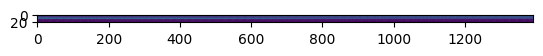

30
[[1.60074842 4.04431396 1.73243925 ... 2.57784285 3.36212351 2.88091738]
 [2.22092408 2.24821369 2.9250616  ... 2.87607787 2.79011443 2.55988309]
 [2.30779175 2.32798054 3.22236383 ... 1.68307177 1.70209052 0.12198799]
 ...
 [0.41909142 0.62863329 0.04940317 ... 2.18456151 2.60467759 1.95023826]
 [3.03912833 2.10694152 3.23298473 ... 0.77526336 3.51930159 2.31827296]
 [2.03391695 2.76088989 3.63093783 ... 1.72491307 1.76839716 3.11370495]]


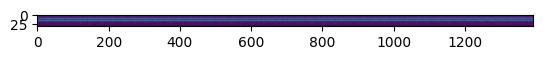

40
[[1.87682069 2.93388579 2.09828191 ... 1.96611728 2.06474972 1.85630837]
 [2.0616257  2.33832023 1.63806469 ... 2.89413109 2.56966226 2.11171987]
 [2.0977197  1.92450934 2.21980405 ... 2.50857924 2.15077821 3.40205605]
 ...
 [1.26771496 1.54805785 2.40845449 ... 3.15156803 2.46793357 2.00856009]
 [2.47950671 3.28647255 2.40310964 ... 2.60661378 1.10913697 3.50566274]
 [2.26068508 2.28458138 1.84555252 ... 2.37495804 1.66922194 3.61791225]]


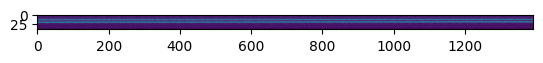

50
[[2.0918653  2.44343072 2.62868095 ... 2.35808033 1.81517531 2.35194866]
 [2.35988955 4.59005715 1.83226552 ... 3.1738803  2.29219581 1.66623299]
 [2.46233901 5.29555049 2.71479209 ... 2.97173714 3.68532067 2.2486525 ]
 ...
 [2.64807048 2.25078763 2.20164533 ... 2.76887169 2.00180928 4.16486842]
 [2.77720781 2.3957372  2.0864035  ... 2.72042393 1.56837033 4.75902291]
 [2.06776823 2.18545088 1.83463046 ... 1.74849487 2.01673081 2.78614644]]


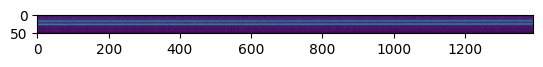

60
[[2.27113515 2.51813788 4.31116687 ... 1.48192452 2.03909737 1.81054013]
 [2.23884102 2.36090073 1.93396573 ... 2.64915037 1.95091915 1.33311632]
 [2.79875279 2.1501203  2.01794035 ... 3.01532167 1.8794591  2.5094952 ]
 ...
 [4.20408412 2.32211541 2.25664527 ... 3.22483627 2.34257899 1.90805292]
 [3.21557473 1.65717358 2.83096699 ... 2.51071904 2.93183367 1.87748754]
 [2.96462162 2.20512438 2.82837943 ... 1.63906859 2.84449515 2.58303551]]


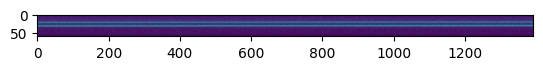

In [2]:
import threading

import numpy as np
import zmq

from tr_ap_xps.processor import Result


def got_a_result(result):
    print(result)    
    plt.imshow(result.integrated_frame)
    plt.imshow(result.filtered_integrated_frame)
    plt.show()


def listen():
    while True:
        frame_info = socket.recv_json()
        integrated_frame = socket.recv()
        filtered_integrated_frame = socket.recv()
        shape = frame_info['shape']
        print(f"{shape=}")
        print(f"{tuple(shape)=}")
        np_integrated_frame = np.frombuffer(integrated_frame, dtype=frame_info['dtype']).reshape(tuple(shape))
        np_integrated_filtered_frame = np.frombuffer(filtered_integrated_frame, dtype=frame_info['dtype']).reshape(tuple(shape))
        got_a_result(
            Result(
                frame_info['frame_number'],
                np.frombuffer(np_integrated_frame),
                np.frombuffer(np_integrated_filtered_frame)))
        


ctx = zmq.Context()
socket = ctx.socket(zmq.SUB)
socket.connect("tcp://127.0.0.1:5559")
socket.setsockopt(zmq.SUBSCRIBE, b"")

# Create and start a new thread for the listen function
listen_thread = threading.Thread(target=listen)
listen_thread.start()


Exception in thread Thread-4 (listen):
Traceback (most recent call last):
  File "/home/dylan/miniconda3/envs/apxps/lib/python3.12/threading.py", line 1073, in _bootstrap_inner
    self.run()
  File "/home/dylan/miniconda3/envs/apxps/lib/python3.12/site-packages/ipykernel/ipkernel.py", line 761, in run_closure
    _threading_Thread_run(self)
  File "/home/dylan/miniconda3/envs/apxps/lib/python3.12/threading.py", line 1010, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_237514/1654708626.py", line 26, in listen
  File "/tmp/ipykernel_237514/1654708626.py", line 11, in got_a_result
  File "/home/dylan/miniconda3/envs/apxps/lib/python3.12/site-packages/matplotlib/pyplot.py", line 3476, in imshow
    __ret = gca().imshow(
            ^^^^^^^^^^^^^
  File "/home/dylan/miniconda3/envs/apxps/lib/python3.12/site-packages/matplotlib/__init__.py", line 1473, in inner
    return func(
           ^^^^^
  File "/home/dylan/miniconda3/envs/apxps/lib/python3.12/site-packa

shape=[1, 100]
tuple(shape)=(1, 100)
Result(frame_number=0, integrated_frame=array([1005.626, 1019.335, 1001.242, 1002.48 ,  974.181, 1013.157,
        997.804, 1006.143,  986.446, 1013.901, 1002.729, 1020.789,
        983.27 , 1009.276,  977.732, 1014.66 , 1000.733,  972.923,
        987.693,  990.083,  984.417,  972.425,  991.815,  999.517,
       1003.342, 1009.124,  992.663,  999.724, 1001.301,  976.455,
        985.484, 1030.093, 1014.893,  990.859,  986.21 , 1002.429,
       1016.1  ,  975.23 , 1011.709,  962.983, 1016.017,  976.626,
        986.85 ,  955.962,  997.005,  985.164,  994.324,  972.542,
        998.378,  982.649, 1008.54 ,  975.391, 1008.325, 1022.049,
        992.771, 1026.512, 1024.563,  992.079, 1003.38 , 1016.821,
        976.634,  988.401, 1007.044,  985.801, 1009.982, 1002.46 ,
        996.518, 1027.269, 1015.629,  978.547, 1011.097, 1001.726,
        984.489, 1001.212, 1038.528,  979.636,  978.155, 1015.275,
        955.509,  995.64 , 1008.252, 1002.787, 1017.

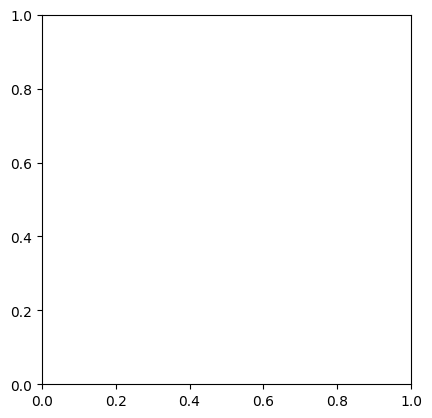

In [3]:
listen_thread.join()

In [12]:
np_integrated_filtered_frame = np.frombuffer(filtered_integrated_frame, dtype=frame_info['dtype']).reshape(tuple(shape))

NameError: name 'filtered_integrated_frame' is not defined


# How long did it take?

We stored a table in Tiled for timing. We can see how long function calls took per frame.

In [ ]:
data = xps_dataset.timing_node.read()

for column in data.columns:
    plt.figure()  # Create a new figure for each plot
    plt.plot(data[column])
    plt.xlabel('Index')
    plt.ylabel(column)
    plt.title(f'Line Plot of {column}')
    plt.show()

plt.legend()
plt.show()


In [ ]:


plt.imshow(xps_dataset.lines_raw_node.read())
plt.colorbar()
plt.title('Horizontally integrated frames')
plt.show()


plt.imshow(xps_dataset.lines_filtered_node.read())
plt.colorbar()
plt.title('Horizontally integrated filtered frames')
plt.show()